In [42]:
from random import *  
from math import sqrt  
import numpy as np
from numpy.random import uniform
import scipy.stats as st
import matplotlib.pyplot as plt
import math  

HW1. MCMC exercise 1

In [43]:
def pi(arr):
    if len(arr)==1:
        return arr[0]
    else:
        a=arr[-1]
        result=a*pi(arr[:-1])
        return result

In [56]:
xseq1=[1, 1.3, 1.4, 1.1, 1, 5, 0.5, 0.6, 2, 3]; # pi(xseq)=20 에서 너무 벗어나지 않도록 임의로 설정
xseq2=[2, 0.7, 1.7, 0.9, 1, 1.3, 1.4, 3, 1.3, 1.6]; # pi(xseq)=20 에서 너무 벗어나지 않도록 임의로 설정
x1history1=[]; # x1 sampling history of way1
x1history2=[]; # x1 sampling history of way2
pixhistory1=[]; # pix sampling history of way1
pixhistory2=[]; #pix sampling history of way2

In [58]:
pi(xseq1)

18.017999999999994

In [59]:
pi(xseq2)

24.3262656

In [60]:
np.random.exponential(1, 10)

array([2.68358315, 0.80403312, 0.64866068, 4.92126087, 0.62825611,
       0.24346055, 1.3624449 , 1.08814033, 0.59534459, 1.28182366])

In [70]:
#way 1
for i in range(10000):
    for j in range(10):
        xjcandidate=np.random.exponential(1); #xj 를 exp 에서 후보 뽑기
        xseqcandidate=xseq1; #x(j-1) 까지 업데이트 되었던 xseq 가져오기
        xseqcandidate[j]=xjcandidate; #[x1,x2,,,,xj,,,,x10] 후보 새롭게 구성
        if pi(xseqcandidate)>20: #새롭게 구성한 [x1,x2,,,,xj,,,,x10] pi 값 확인
            xseq1=xseqcandidate; #20이 넘는다면 후보를 accept
        else:
            while pi(xseqcandidate)>20: #pi 가 20이 안 넘으면 넘을때까지...
                xjcandidate=np.random.exponential(1);
                xseqcandidate[j]=xjcandidate;
            xseq1=xseqcandidate; #넘었으니 accept
    x1history1.append(xseq1[0]); #x1~x10 까지 전부 업데이트한 xseq 을 sampling 으로 accept, 그중 x1 sampling 모으기
    pixhistory1.append(pi(xseq1)); #pi x sampling 모으기

In [71]:
#way 2
for k in range(10000):
    for l in range(10):
        xother=xseq2[:l]+xseq2[l+1:];
        piother=pi(xother); #xl 빼고 나머지 값들의 곱
        minimum=20/piother; #xl 이 가질수 있는 최솟값
        xseq2[l]=st.expon.rvs(minimum) # st.expon.rvs(a) = random sampling of f(x)=exp(-(x-a)), x>=a
    x1history2.append(xseq2[0]); #x1~x10 까지 전부 업데이트한 xseq 을 sampling 으로 accept, 그중 x1 sampling 모으기
    pixhistory2.append(pi(xseq2)); #pi x sampling 모으기

In [72]:
x1history1=x1history1[:9500];
pixhistory1=pixhistory1[:9500];
x1history2=x1history2[:9500];
pixhistory2=pixhistory2[:9500];

In [73]:
xaxis=[];
for k in range(9500):
    xaxis.append(k+1)

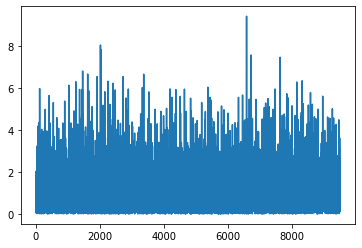

In [74]:
plt.plot(xaxis,x1history1);

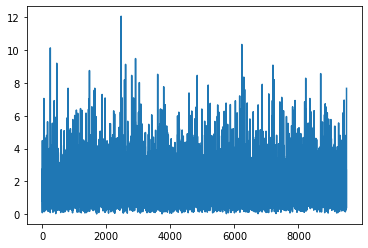

In [75]:
plt.plot(xaxis,x1history2);


1.0096635995463294


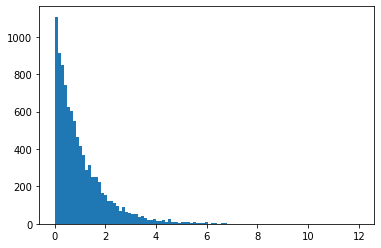

In [76]:
mean1=sum(x1history1)/len(x1history1)
print(mean1)
xaxis=np.linspace(0,12,100)
plt.hist(x1history1, bins=xaxis);

1.8575711252059268


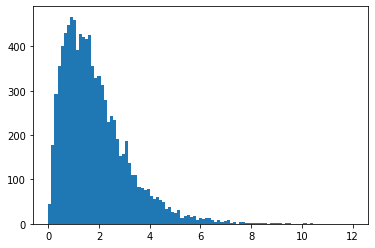

In [77]:
mean2=sum(x1history2)/len(x1history2)
print(mean2)
plt.hist(x1history2, bins=xaxis);

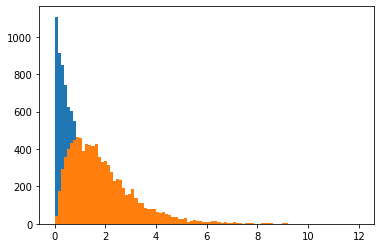

In [78]:
plt.hist(x1history1, bins=xaxis);
plt.hist(x1history2, bins=xaxis);

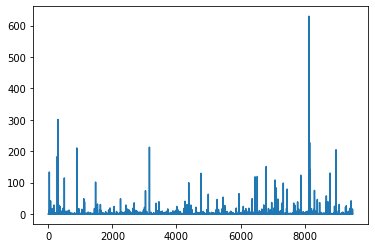

In [79]:
plt.plot(pixhistory1);

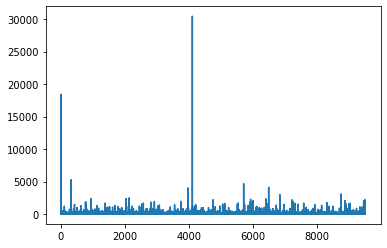

In [80]:
plt.plot(pixhistory2);

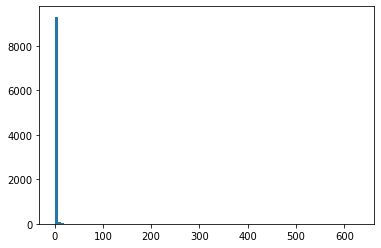

In [89]:
plt.hist(pixhistory1, bins=100);

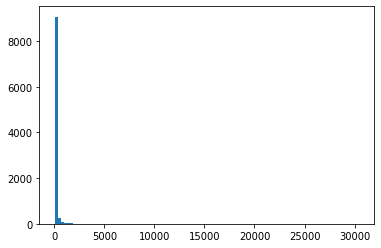

In [90]:
plt.hist(pixhistory2, bins=100);

HW2. generating pi

In [29]:
inside=0  
n=100000
x_save = []
y_save=[]
for i in range(n):  
    x=random.uniform(-1,1)  
    y=random.uniform(-1,1)
    x_save.append(x)
    y_save.append(y)  
    if sqrt(x*x+y*y)<=1:  
        inside+=1  
pi=4*inside/n  
print(pi)

3.13232


<function matplotlib.pyplot.show>

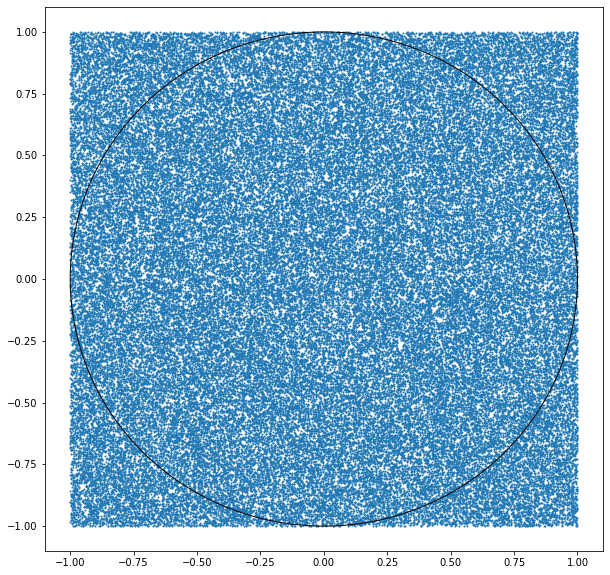

In [30]:
# draw!
fig, ax = plt.subplots(1,1,figsize=(10,10))
circle=plt.Circle((0, 0), 1, fill=False)
plt.scatter(x_save,y_save, s=1)
ax.add_artist(circle)
plt.show

4.0


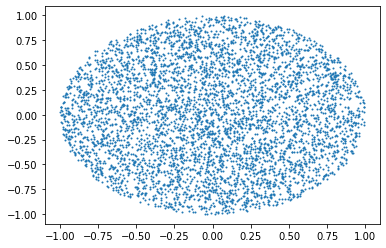

In [41]:
R = 1
n = 5000
inside=0

theta = np.random.uniform(0,2*np.pi, n)
radius = np.random.uniform(0,R, n)**0.5
x = radius * np.cos(theta)
y = radius * np.sin(theta)
for i in range(n):       
    if sqrt(x[i]*x[i]+y[i]*y[i])<=1:  
        inside+=1  
pi=4*inside/n  
print(pi)

# visualize the points:
plt.scatter(x,y, s=1)

playing with MCMC

In [ ]:
# https://chi-feng.github.io/mcmc-demo/
Gibbs sampling, MCMC 비교, 관찰